In [3]:
# !pip install scanpy
import os
import numpy as np
import pandas as pd
import time
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import backend as K
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
import model

In [5]:
# os.listdir('../DATA/')

In [6]:
gex_input_df=pd.read_csv('../DATA/gex_input_824_hvf.csv.gz').set_index('Unnamed: 0')
print(gex_input_df.shape)
gex_data = gex_input_df
# gex_tensor = tf.convert_to_tensor(gex_data, dtype=tf.float32)

(5220, 824)


In [7]:
atac_input_df=pd.read_csv('../DATA/atac_input_3024_hvf.csv.gz').set_index('Unnamed: 0')
print(atac_input_df.shape)
atac_data = atac_input_df

(5220, 3024)


In [8]:
for step,batch in enumerate(gex_data):
    print(step)
    break

0


In [9]:
batch

'CD2'

In [10]:
X_train, X_test, y_train, y_test = train_test_split(gex_data, gex_data, test_size=0.2, random_state=42,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4176, 824)
(1044, 824)
(4176, 824)
(1044, 824)


In [11]:
X_train

,CD2,BCL11A,PLAG1,SLC24A4,MGAT4A,ITM2A,ANXA1,TNFSF13B,TIAM1,YPEL1,...,KLRG1,AC139720.1,HLA-DPB1,PPM1L,RAB11FIP1,CSF2RA,ADAM28,NEAT1,TBC1D4,LEF1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AGGTTAGAGCATGAAG-1,1.113584,-0.399262,-0.247881,-0.185028,-0.736633,-0.352862,0.470520,-0.378872,-0.463676,-0.268768,...,-0.430789,-0.472180,-0.642098,-0.340579,-0.606041,-0.270760,-0.402460,-1.357663,-0.337139,-0.966032
CGAATATGTTTATCTG-1,-0.862723,-0.263113,-0.191096,-0.453300,-0.815262,-0.458687,-0.865424,-0.459459,1.694116,-0.241920,...,-0.442877,-0.719484,-0.342177,-0.362873,-0.758795,-0.340960,-0.183213,-1.582240,-0.440446,-1.106136
AAGCTAGAGCCTGATG-1,1.404879,-0.316811,-0.291384,0.008488,-0.881196,-0.422944,-0.386494,-0.034010,2.110918,-0.309825,...,-0.527305,2.620933,1.731413,-0.133861,1.709566,0.054800,-0.447662,-0.919493,-0.274315,1.017033
GATAACGAGTAGCGCC-1,-0.769148,-0.338789,-0.208775,-0.367639,-0.754277,-0.398797,2.538502,-0.484837,-0.548274,-0.246627,...,-0.420259,-0.584895,-0.512755,-0.389735,1.466498,-0.367549,-0.273354,1.173930,-0.405375,-0.996649
AGTTACATCCTAAGAC-1,1.104595,-0.374637,-0.216084,-0.331929,1.105400,-0.370345,1.289747,-0.502240,-0.542196,-0.248073,...,-0.408325,1.415481,-0.593855,-0.405471,-0.761963,-0.385177,-0.313620,0.373052,-0.390476,0.228890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGAAGTCAACAGCCT-1,-0.225846,0.700399,-0.125094,1.094462,-0.320842,-0.149323,0.296732,-1.362975,-0.899709,-0.152110,...,-0.154363,-0.082678,-1.232484,-0.931229,-1.664879,2.017296,-0.279530,0.079689,-0.513843,-0.211989
GCGGATACAGGAAGCC-1,1.162810,-0.338288,-0.215205,-0.338284,-0.762829,-0.399697,-0.837236,1.719795,-0.530222,-0.251413,...,-0.427906,4.765987,-0.509800,-0.371047,-0.717631,-0.336435,-0.287717,0.881226,3.510094,0.972248
GTGGTTAGTCCGGTTC-1,-0.885143,-0.305885,-0.268434,-0.097098,1.392482,4.818314,-0.497991,-0.133432,-0.369574,-0.294136,...,-0.507214,-0.629490,-0.419803,-0.187650,-0.356195,-0.037745,-0.388042,-1.073093,3.009335,1.840169


In [12]:
# gex_data

In [13]:
###HERES where to set up the train enumerate

batch_size=256

train_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_dataset = test_dataset.batch(batch_size)

In [14]:
train_dataset

<BatchDataset shapes: (None, 824), types: tf.float64>

In [15]:
for step,batch in enumerate(train_dataset):
    print(step)
    break
batch

0


<tf.Tensor: shape=(256, 824), dtype=float64, numpy=
array([[-6.5002440e-01,  2.2249880e+00, -1.8979418e-01, ...,
         1.3766096e+00, -4.3021770e-01, -8.2409996e-01],
       [-9.5907890e-01, -2.2535118e-01, -2.2668669e-01, ...,
        -1.2660775e+00, -3.8645430e-01, -1.2618870e+00],
       [-4.7783980e-01, -5.1689740e-01, -1.8682280e-01, ...,
         3.6944363e-01, -4.2514860e-01, -5.9425260e-01],
       ...,
       [ 1.2816715e+00, -3.2108498e-01, -2.5309208e-01, ...,
         1.9330479e+00, -3.3558193e-01, -1.1325834e+00],
       [-8.5048220e-01, -3.1142002e-01, -2.4485170e-01, ...,
        -1.2548194e+00,  2.7986705e+00, -1.1329450e+00],
       [ 1.1466129e+00, -3.9347032e-01, -2.6375142e-01, ...,
         2.1878291e-04, -3.1209734e-01, -1.0136272e+00]])>

In [16]:
vae=model.VAE(X_train.shape[1],epochs=3000)


In [17]:
len(X_train)/batch_size

16.3125

In [18]:
vae.train_vae(train_dataset,test_dataset)


Start of epoch 0
Training loss (for one batch) at step  0 tf.Tensor(271.59451030245873, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 1.1078
KL Divergence: 2.7240619659
Validation acc: 1.0701
Validation loss: tf.Tensor(
[[2.02121369e+02 1.78697752e+01 3.73559839e+03 ... 1.07342649e+01
  4.57857715e+01 3.97335493e+02]
 [3.83935171e+02 1.09848880e+02 3.46184089e+00 ... 5.46837609e+01
  8.16418308e+01 1.37839956e+02]
 [1.23035482e+02 8.66067939e+02 2.77537827e+01 ... 4.58247047e+00
  4.43798338e+01 1.31047330e+02]
 ...
 [3.78242137e+00 1.49442560e+03 3.37195991e+00 ... 5.69762478e+02
  2.63743525e+01 2.14527445e+02]
 [2.88692199e+02 1.25285353e+01 1.16496234e+01 ... 2.89226327e+00
  1.25621248e+01 7.80407477e+02]
 [2.41805226e+01 8.61556126e+01 2.26340301e+01 ... 5.85600028e+00
  4.31057285e+01 6.47508897e+01]], shape=(20, 824), dtype=float64)

Start of epoch 1
Training loss (for one batch) at step  0 tf.Tensor(219.5068055786965, shape=(), dtype=float64)
Reconstruction

Reconstruction Training acc over epoch: 0.8517
KL Divergence: 8.0547161102
Validation acc: 0.8521
Validation loss: tf.Tensor(
[[ 219.00986139   15.96845936 3168.95088727 ...  152.00656075
    95.54358712   15.8221534 ]
 [  51.27606991   12.54450999   11.51076999 ...   31.9447194
    13.54827102   16.30453347]
 [  62.15225268   19.60493459   37.99386991 ...  108.41605686
    11.32085291  110.72969512]
 ...
 [  13.92888051  137.92335357   57.75432517 ...   11.31768653
    13.79563413   11.94269137]
 [ 235.82835667   18.10121042   63.23569854 ...   50.64634689
    89.83609713   65.73947772]
 [  11.56088605  171.74263091   12.54194565 ...   22.78119928
    26.63863942   14.31885351]], shape=(20, 824), dtype=float64)

Start of epoch 11
Training loss (for one batch) at step  0 tf.Tensor(179.8224167783787, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8503
KL Divergence: 7.6973390579
Validation acc: 0.8515
Validation loss: tf.Tensor(
[[ 307.87945853   42.74289053 3447.400

Reconstruction Training acc over epoch: 0.8312
KL Divergence: 8.5929269791
Validation acc: 0.8326
Validation loss: tf.Tensor(
[[ 164.42073574   10.91742102 3448.6895756  ...   68.03729336
    66.06374089   63.33652286]
 [ 161.73799199   14.04305428   11.06717309 ...   15.77115247
    11.5798133    13.02281532]
 [  18.00687935   24.1067847    56.07119249 ...  209.78288911
    17.53139896   10.96795569]
 ...
 [  11.51206455  292.56981594   59.25258294 ...  102.42690659
    11.9254084    14.12525334]
 [ 184.14264052   11.05166077   90.53839063 ...  121.78187736
    85.20361709   53.70607745]
 [  10.91258173  218.97487241   12.80249108 ...   17.35976528
    53.07437321   13.78108267]], shape=(20, 824), dtype=float64)

Start of epoch 21
Training loss (for one batch) at step  0 tf.Tensor(175.59428908940563, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8304
KL Divergence: 8.2348690033
Validation acc: 0.8307
Validation loss: tf.Tensor(
[[ 210.05415111   33.88174778 3662.8

Reconstruction Training acc over epoch: 0.8199
KL Divergence: 8.4168262482
Validation acc: 0.8216
Validation loss: tf.Tensor(
[[ 211.14925215   79.80912002 3309.22534959 ...  207.22364807
    85.87892254  187.61915387]
 [ 196.1240336    12.94477479   12.96159044 ...   18.81298537
    10.74643465   34.26607366]
 [  10.87852486   10.8226116    18.87946626 ...   87.21142745
    11.8479978   123.26854051]
 ...
 [  10.84694037  390.30812495   37.81407188 ...  187.21591452
    13.3177283    14.86547239]
 [ 127.56810703   10.67492147   55.30248696 ...   47.64188509
    37.83162669  169.0751586 ]
 [  18.62525048  113.80100092   11.17343806 ...   13.89071549
    28.58127389   10.71377685]], shape=(20, 824), dtype=float64)

Start of epoch 31
Training loss (for one batch) at step  0 tf.Tensor(170.13331328658086, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8188
KL Divergence: 8.0405826569
Validation acc: 0.8207
Validation loss: tf.Tensor(
[[ 239.82445092   29.69467423 3383.6

Reconstruction Training acc over epoch: 0.8133
KL Divergence: 9.1054515839
Validation acc: 0.8165
Validation loss: tf.Tensor(
[[ 103.43680202    9.81527822 3310.12501471 ...  235.49789594
    84.28133574   21.27467697]
 [ 175.54478176    9.7324875    10.38922315 ...   58.93839543
    22.58209782   70.56983759]
 [  13.77221233    9.78487999   50.30432573 ...  248.42248436
    15.97383349   11.1839066 ]
 ...
 [  10.18777496  763.17755308   36.81210294 ...  264.46225261
    12.03327682   30.63474177]
 [ 219.98349052   17.22329462   64.41941628 ...   84.79704219
    36.23671016  110.86965719]
 [   9.71089309  136.73010144   16.59260209 ...   30.79716844
    50.83781905   36.8389018 ]], shape=(20, 824), dtype=float64)

Start of epoch 41
Training loss (for one batch) at step  0 tf.Tensor(169.9673202568276, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8128
KL Divergence: 8.1785459518
Validation acc: 0.8151
Validation loss: tf.Tensor(
[[ 163.88525606   16.80300197 3186.09

Reconstruction Training acc over epoch: 0.8098
KL Divergence: 8.1785249710
Validation acc: 0.8117
Validation loss: tf.Tensor(
[[ 129.2784729    12.22767118 3071.32863382 ...  340.58119979
   116.75983518   11.6672852 ]
 [  91.39495346   24.24220733    9.81932914 ...   10.26299659
     9.71919666   53.71022893]
 [  11.65834686   10.25408263   29.57435282 ...  208.87813061
    14.83498405   13.32950146]
 ...
 [  24.85521912  510.34960647   39.7829357  ...  152.79968508
    11.12928214    9.55847799]
 [ 169.46765969   10.79485383   71.83692311 ...  140.89431095
   107.01921945   53.46263143]
 [  19.86137443  108.85016514    9.44783225 ...   10.18760288
    22.17606235   35.01531792]], shape=(20, 824), dtype=float64)

Start of epoch 51
Training loss (for one batch) at step  0 tf.Tensor(170.78100729913703, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8097
KL Divergence: 8.2929658890
Validation acc: 0.8120
Validation loss: tf.Tensor(
[[ 234.12005017   46.7661973  3131.8

Reconstruction Training acc over epoch: 0.8081
KL Divergence: 8.8795070648
Validation acc: 0.8093
Validation loss: tf.Tensor(
[[ 101.08980966   11.2085733  3380.66770925 ...  153.11033654
    69.60512197   34.92370272]
 [ 150.79049624   21.54887291   10.46758519 ...   21.28407466
    10.81325773   13.93078405]
 [  25.21982211    9.91710649   43.25045552 ...  309.04188629
    23.38264617   11.69111045]
 ...
 [   9.93835379  412.30498633   70.30470209 ...   96.31081931
    10.02369038   20.8957704 ]
 [ 163.72675733   12.75071783   83.73519531 ...   32.8940951
    60.05214209   45.79235814]
 [  13.37491329  146.7195521    12.18318721 ...   10.86127137
    20.09165223   15.66014905]], shape=(20, 824), dtype=float64)

Start of epoch 61
Training loss (for one batch) at step  0 tf.Tensor(170.94891083103894, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8074
KL Divergence: 8.9778032303
Validation acc: 0.8097
Validation loss: tf.Tensor(
[[ 195.93965578    9.51801618 3006.88

Reconstruction Training acc over epoch: 0.8065
KL Divergence: 8.9879331589
Validation acc: 0.8093
Validation loss: tf.Tensor(
[[ 108.40757874    9.252984   3319.9901506  ...  190.34729518
    89.51778451   52.3422906 ]
 [ 188.75781702    9.19714342    9.40704565 ...    9.26270948
     9.32373492    9.18851474]
 [  12.65194143    9.74617433   30.40746148 ...  189.43524775
    16.2824116    17.05356244]
 ...
 [  31.23761665  572.54166058   37.38161707 ...  210.12151816
    10.23604578    9.20381028]
 [ 112.96461645   15.71620014   76.4769384  ...  198.59560715
   147.97774723   38.16926571]
 [  12.3483604   160.37306687   11.03048561 ...    9.22258912
    27.20576751   18.31499662]], shape=(20, 824), dtype=float64)

Start of epoch 71
Training loss (for one batch) at step  0 tf.Tensor(168.0110503795698, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8067
KL Divergence: 8.5476713181
Validation acc: 0.8068
Validation loss: tf.Tensor(
[[ 171.46569258    9.62350521 3553.98

Reconstruction Training acc over epoch: 0.8057
KL Divergence: 8.4426374435
Validation acc: 0.8066
Validation loss: tf.Tensor(
[[ 176.02286509    9.32921278 3188.52109789 ...  206.82791012
   108.9229457     9.48989039]
 [ 174.49514917    9.92233018    9.62512694 ...   12.44006216
     9.45514451   11.66072642]
 [   9.66684554   10.02256999   35.92572664 ...  227.23543501
    18.35412798   10.32586643]
 ...
 [  14.01749058  412.38905974   61.70623273 ...   82.96737687
    12.57311219   26.31520003]
 [ 188.00758753   15.13964199   63.17503489 ...   32.83290542
    39.22840739   85.91107466]
 [  11.62894595   72.2533912     9.57708946 ...   31.27507949
    14.98569416   46.62716535]], shape=(20, 824), dtype=float64)

Start of epoch 81
Training loss (for one batch) at step  0 tf.Tensor(168.7499209098119, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8053
KL Divergence: 8.4069404602
Validation acc: 0.8077
Validation loss: tf.Tensor(
[[ 184.10032627   20.18291528 3054.11

Reconstruction Training acc over epoch: 0.8045
KL Divergence: 8.9309148788
Validation acc: 0.8075
Validation loss: tf.Tensor(
[[ 132.19143754   11.71876828 3179.54216859 ...  264.92552427
    71.36497668   11.59257311]
 [ 172.4504645     9.26424688    9.58505747 ...   13.03250525
    10.36558191    9.83985722]
 [  13.24644121   10.71926039   16.84474367 ...  173.35227836
    11.16732217   71.84215526]
 ...
 [   9.65307242  512.54784443   58.83777225 ...   75.08924063
     9.27535082   46.3968602 ]
 [ 177.8411084    11.61403092   72.18049219 ...  107.08574775
    43.83409049  125.00428701]
 [  12.5263212    49.45154811    9.40248557 ...   15.80364745
    41.04461115    9.85524354]], shape=(20, 824), dtype=float64)

Start of epoch 91
Training loss (for one batch) at step  0 tf.Tensor(171.7036561341773, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8043
KL Divergence: 8.8725957870
Validation acc: 0.8070
Validation loss: tf.Tensor(
[[ 141.29098596    9.5047107  3058.97

Reconstruction Training acc over epoch: 0.8037
KL Divergence: 7.8705682755
Validation acc: 0.8063
Validation loss: tf.Tensor(
[[ 207.0253443    16.65422676 3105.89032088 ...  235.96278882
   158.51007216   10.84156302]
 [ 373.31932648   10.84701154   14.87676258 ...   24.22240704
     9.30611485   20.5418755 ]
 [  16.28276542    9.23746287   27.27934219 ...  129.43738124
    10.4102063    58.96605903]
 ...
 [   9.18975199  367.75270644   43.48554321 ...  160.97298003
    38.43968492   35.43558441]
 [  99.12767809    9.22075729   68.00279762 ...  120.63987384
    58.03225755   91.68241088]
 [  11.1783493   113.16169318   10.22256152 ...    9.2713318
    19.44628127   14.43667424]], shape=(20, 824), dtype=float64)

Start of epoch 101
Training loss (for one batch) at step  0 tf.Tensor(172.65707461693015, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8038
KL Divergence: 8.2576732635
Validation acc: 0.8056
Validation loss: tf.Tensor(
[[  56.45534273    9.82733894 3430.6

Reconstruction Training acc over epoch: 0.8036
KL Divergence: 8.3334751129
Validation acc: 0.8049
Validation loss: tf.Tensor(
[[  55.82652611   27.03156118 3396.41336552 ...  131.97188489
    68.25756935   19.35136   ]
 [ 140.84385435    9.42861236   10.00003937 ...   28.25457568
     9.47801043    9.58118252]
 [  10.98328118   17.09979529   31.18163664 ...  198.24258902
    13.91680519   20.43076219]
 ...
 [  30.14217639  622.75400064   66.31312681 ...  154.8834653
     9.56827325   52.27661291]
 [  84.69010986    9.56751422   58.20318148 ...   72.95295778
    75.45091675   83.04238437]
 [  13.88929846   71.47546229   14.21217464 ...   20.65496644
    12.36967483   15.85477181]], shape=(20, 824), dtype=float64)

Start of epoch 111
Training loss (for one batch) at step  0 tf.Tensor(167.7658735810479, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8034
KL Divergence: 7.6941962242
Validation acc: 0.8059
Validation loss: tf.Tensor(
[[  76.56117375   20.0054216  3426.10

Reconstruction Training acc over epoch: 0.8032
KL Divergence: 8.0665378571
Validation acc: 0.8051
Validation loss: tf.Tensor(
[[  55.36344735   12.44390973 3331.45118533 ...  209.73460209
    80.99509589   19.97723186]
 [ 185.95781428    9.35919677   14.48808998 ...   40.15273712
    11.13375125   35.7511585 ]
 [  10.54889685   17.55513484   26.03114781 ...  202.74768884
     9.87084035   12.99902728]
 ...
 [  18.27955379  423.58464728   57.76028305 ...  176.02568829
    14.34169526    9.53218052]
 [ 117.13805632   13.27002147   60.27327076 ...  105.20474138
   102.78596561  110.405841  ]
 [  19.56266361   82.97586109   12.52529154 ...   12.60340361
    24.64170078    9.53534925]], shape=(20, 824), dtype=float64)

Start of epoch 121
Training loss (for one batch) at step  0 tf.Tensor(172.97127780334586, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8030
KL Divergence: 8.2782545090
Validation acc: 0.8051
Validation loss: tf.Tensor(
[[  82.43085132   24.76687913 3244.

Reconstruction Training acc over epoch: 0.8028
KL Divergence: 8.7786664963
Validation acc: 0.8046
Validation loss: tf.Tensor(
[[ 133.48198074    9.67014062 3234.48995578 ...  210.80550515
    95.29350654   12.67561933]
 [  83.49545432   17.7849923    12.4587364  ...   29.01351664
     9.94872338   36.03680445]
 [   9.33534592   16.93966685   41.18591421 ...  222.19921361
    24.6588176    10.05113737]
 ...
 [  11.41765066  357.04399269   85.0214836  ...   90.39320389
     9.3767778    33.20476904]
 [ 222.42271492   21.72015111   86.32472187 ...  119.24271082
    88.50004895   43.87392798]
 [  12.30116697   70.25796554    9.32349374 ...   12.10134801
    15.57191697   13.02863396]], shape=(20, 824), dtype=float64)

Start of epoch 131
Training loss (for one batch) at step  0 tf.Tensor(174.46029423573123, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8026
KL Divergence: 8.2479877472
Validation acc: 0.8047
Validation loss: tf.Tensor(
[[ 197.27298883   80.97775297 3104.

Reconstruction Training acc over epoch: 0.8024
KL Divergence: 8.8507261276
Validation acc: 0.8045
Validation loss: tf.Tensor(
[[  89.44770183    9.33545827 3315.21620583 ...  158.56658527
    64.10123554   16.23933905]
 [ 179.22389774    9.22189161    9.90733585 ...    9.66723242
    13.30468211    9.22497406]
 [   9.44291038   10.1493832    43.17078471 ...  216.80056614
    15.68233618    9.7605539 ]
 ...
 [   9.97478308  393.41600706   47.26692494 ...  137.84275718
    22.32528807   19.29300763]
 [ 186.0602323    17.87091456   47.38992049 ...   90.94751599
   119.03473174   91.69821819]
 [  14.4194291   109.91547357    9.81946384 ...    9.8400901
    48.84455158    9.21017595]], shape=(20, 824), dtype=float64)

Start of epoch 141
Training loss (for one batch) at step  0 tf.Tensor(170.79205248378202, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8021
KL Divergence: 8.8003578186
Validation acc: 0.8042
Validation loss: tf.Tensor(
[[ 142.71250558   15.65488036 3340.3

Reconstruction Training acc over epoch: 0.8022
KL Divergence: 8.9917774200
Validation acc: 0.8042
Validation loss: tf.Tensor(
[[  78.98962386   12.06372025 3276.05101111 ...  183.26070338
    79.36563967   16.17456102]
 [ 275.24731689   17.08096516   10.51678133 ...   17.74382442
     9.36613126    9.40079495]
 [  12.78158631    9.38063147   35.33666329 ...  274.32102203
    10.32961102   15.54326395]
 ...
 [  13.45818654  437.83292519   42.73246312 ...  201.85999456
    18.95170064   13.9874148 ]
 [ 150.92418189    9.45543325   66.7758404  ...   59.83238665
    61.06456396  100.67925879]
 [  29.91026679   77.34732883   10.68665596 ...   25.47903683
    39.87094425   14.16070337]], shape=(20, 824), dtype=float64)

Start of epoch 151
Training loss (for one batch) at step  0 tf.Tensor(172.43931092139522, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8020
KL Divergence: 8.2043170929
Validation acc: 0.8047
Validation loss: tf.Tensor(
[[  91.11946412   29.04118997 3529.

In [14]:
predictions = vae.predict(X_test)

In [15]:
X_test

,CD2,BCL11A,PLAG1,SLC24A4,MGAT4A,ITM2A,ANXA1,TNFSF13B,TIAM1,YPEL1,...,KLRG1,AC139720.1,HLA-DPB1,PPM1L,RAB11FIP1,CSF2RA,ADAM28,NEAT1,TBC1D4,LEF1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
CCACACAAGGCAATAG-1,-0.825693,-0.301006,-0.208736,-0.370248,1.260230,-0.429374,-0.820909,-0.427755,-0.533399,-0.250743,...,-0.441614,1.526286,-0.425139,-0.351480,-0.705344,-0.312750,-0.248428,0.593921,3.683218,0.244894
AGCATTTCACGAATCC-1,-0.608001,-0.400245,-0.146979,-0.646108,1.005111,-0.344299,1.311825,0.916254,-0.744230,-0.194413,...,-0.314686,-0.491343,-0.672520,-0.626853,-1.208752,2.194134,-0.172552,0.807704,-0.499481,-0.734350
CTTCAGGAGTCATGCG-1,-0.721976,1.644605,-0.227172,-0.280650,-0.727574,-0.363604,-0.834994,-0.460426,-0.515130,-0.255202,...,-0.415708,-0.502834,2.493272,-0.383650,-0.708676,-0.346436,-0.345124,-1.488595,-0.371807,-0.949041
TCGATTAAGAGCCGCT-1,-0.713829,-0.405628,-0.248827,-0.180294,-0.730831,-0.347783,1.207622,-0.383739,-0.463573,-0.268766,...,4.195238,-0.460972,1.060840,-0.344367,-0.609082,-0.275551,-0.408807,0.773372,-0.335060,-0.955592
CATCCTGGTAGGTTGC-1,-0.517914,-0.454684,-0.139332,3.195840,-0.540753,-0.299648,1.532155,1.385378,2.902163,-0.182814,...,-0.275096,-0.398734,0.607210,-0.703752,-0.067267,1.895989,-0.190866,0.715974,-0.507034,-0.609222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCGGTTAAGAAAGGAA-1,-0.729896,-0.333553,-0.166660,-0.560451,-0.707601,-0.399793,1.071248,2.988220,-0.663135,-0.216211,...,-0.374997,-0.602662,-0.512359,2.930952,1.132393,1.793061,-0.173682,0.965366,-0.473628,-0.911120
GCTTTGTGTGGGAACA-1,2.202849,-0.293540,-0.278904,-0.050043,1.476811,-0.440819,-0.422927,-0.061803,3.432941,-0.303195,...,3.869273,-0.648685,-0.388252,-0.145513,-0.276960,0.029695,-0.403850,-0.978325,3.188307,1.260489
CTTGGACCAAGATTCT-1,-0.664166,3.086506,-0.227676,-0.275844,-0.685460,-0.332098,-0.886636,-0.516967,-0.529190,-0.251297,...,-0.394210,-0.435298,1.981155,-0.421803,-0.758828,-0.400775,1.901550,-1.540422,-0.367591,-0.873070


In [16]:
vae.correlation_accuracy(X_test.to_numpy())
# vae.mse_error(X_train)
vae.mse_error(X_test.to_numpy())

0.42180155926353174
0.803334518791702


In [17]:
predictions=pd.DataFrame(predictions,columns=X_test.columns,index=X_test.index)
predictions.to_csv('DATA/custom824_pred.csv.gz')

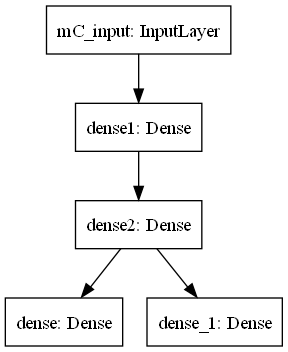

In [18]:
plot_model(vae.encoder)


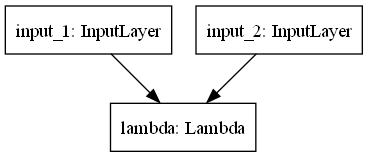

In [18]:
plot_model(vae.sampler)

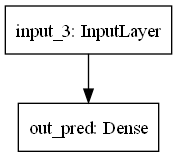

In [19]:
plot_model(vae.decoder)

In [20]:
vae.model_summary()

Encoder Summary:
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mC_input (InputLayer)           [(None, 824)]        0                                            
__________________________________________________________________________________________________
dense1 (Dense)                  (None, 128)          105600      mC_input[0][0]                   
__________________________________________________________________________________________________
dense2 (Dense)                  (None, 64)           8256        dense1[0][0]                     
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           2080        dense2[0][0]                     
___________________________________________________________________________